## INTRODUCTION

This document is created with the purpose of conducting inference of the previously built ANN model under the file [modeling.ipynb](modeling.ipynb)

In [1]:
# Import libraries
import pandas as pd
import json
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import urllib.request

In [2]:
# Load all preprocessing components
model = tf.keras.models.load_model('best_model.keras')

with open("model_config.json", "r") as f:
    config = json.load(f)
with open("categorization.json", "r") as c:
    categorization = json.load(c)

BATCH_SIZE = config["BATCH_SIZE"]
img_height = config["img_height"]
img_width = config["img_width"]
IMG_SIZE = tuple(config["IMG_SIZE"])
class_names = config["class_names"]

In [3]:
# load image
def load_inference_image(file):
  img = tf.keras.utils.load_img(file, target_size=(img_height,img_width))
  x = tf.keras.utils.img_to_array(img)
  plt.imshow(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  return images

Predict

In [4]:
# prediction function
def print_category(item):
    for category, items in categorization.items():
        if item in items:
            print(f"garbage treatment: '{category}'.")
            return
    print(f"{item} not found in any category.")

def prediction(img_file):
  images = load_inference_image(img_file)
  y_pred_proba = model.predict(images)
  y_pred_class = np.argmax(y_pred_proba[0])
  y_pred_class_name = class_names[y_pred_class]

  print('Prediction : {}'.format(y_pred_class_name))
  print_category(y_pred_class_name)

def retrieve_image(url, filename):
    urllib.request.urlretrieve(url, filename) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction : glass
garbage treatment: 'inorganic-recyclable'.


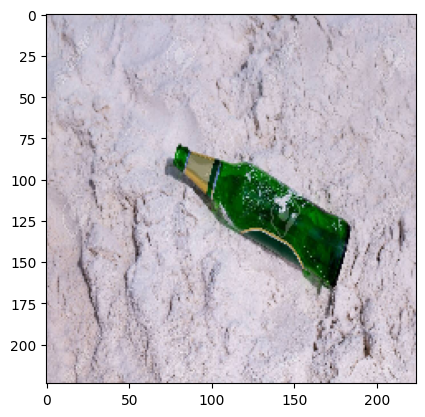

In [5]:
retrieve_image("https://previews.123rf.com/images/cgdeaw/cgdeaw2008/cgdeaw200800061/152724196-glass-bottle-waste-glass-bottle-garbage-on-the-sand-floor.jpg", "glass_bottle.jpg")
prediction('glass_bottle.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Prediction : plastic
garbage treatment: 'inorganic-recyclable'.


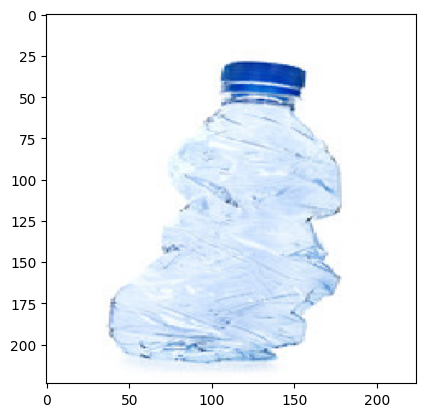

In [6]:
retrieve_image("https://t3.ftcdn.net/jpg/00/72/57/00/240_F_72570060_FqIwEvQi7S10V1hboNGcBsTFEW7v3KW8.jpg", "plastic_bottle.jpg")
prediction('plastic_bottle.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Prediction : metal
garbage treatment: 'inorganic-recyclable'.


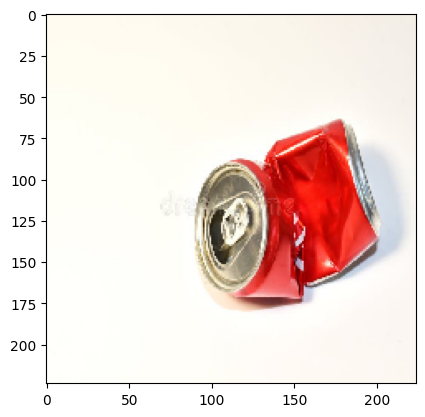

In [7]:
retrieve_image("https://thumbs.dreamstime.com/b/empty-crumpled-can-sweet-carbonated-drink-aluminum-trash-disposal-recycling-%D1%81rushed-soda-cans-220265924.jpg", "coca_cola.jpg")
prediction('coca_cola.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Prediction : plastic
garbage treatment: 'inorganic-recyclable'.


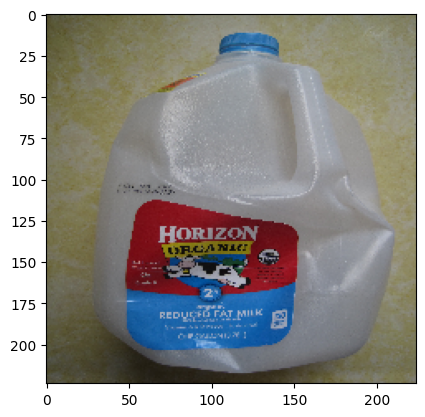

In [8]:
retrieve_image("https://tossingconsumerism.wordpress.com/wp-content/uploads/2014/02/img_1287.jpg", "milk_jug.jpg")
prediction('milk_jug.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Prediction : metal
garbage treatment: 'inorganic-recyclable'.


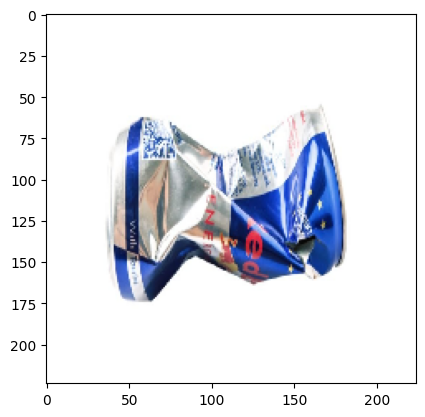

In [9]:
retrieve_image("https://webtechwings.com/wp-content/uploads/2021/02/RedBull_Crash_Can-1024x576.jpg", "rebull_can.jpg")
prediction('rebull_can.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction : trash
garbage treatment: 'non-recylable'.


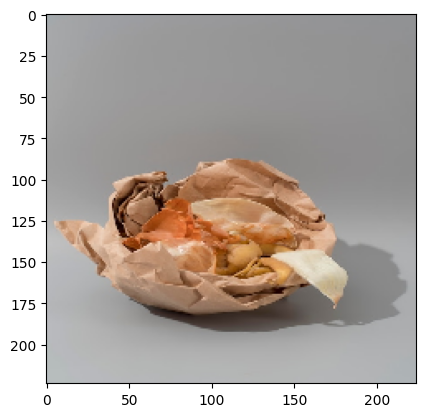

In [10]:
retrieve_image("https://img.freepik.com/free-photo/top-view-trash-cooking-concept_23-2149056439.jpg", "food_wrapper.jpg")
prediction('food_wrapper.jpg')